## Import

In [1]:
import pandas as pd
import numpy as np

# NLP libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exploring your data

In [2]:
video_df = pd.read_csv("../data/processed/video_data_processed.csv")
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
0,WkqM0ndr42c,Data School,My top 50 scikit-learn tips,If you already know the basics of scikit-learn...,python|data science|machine learning|scikit-learn,2023-04-20 14:56:43+00:00,8210.0,355.0,45.0,10051.0,hd,False
1,tWFQqaRtSQA,Data School,21 more pandas tricks,You're about to learn 21 tricks that will help...,python|pandas|data analysis|data science,2022-05-12 16:20:41+00:00,43576.0,1379.0,67.0,1480.0,hd,False
2,gd-TZut-oto,Data School,Adapt this pattern to solve many Machine Learn...,Here's a simple pattern that can be adapted to...,python|machine learning|scikit-learn|data science,2021-10-28 16:16:39+00:00,11707.0,435.0,16.0,469.0,hd,False
3,v2QpvCJ1ar8,Data School,Tune multiple models simultaneously with GridS...,You can tune 2+ models using the same grid sea...,python|machine learning|scikit-learn|data science,2021-10-26 13:53:24+00:00,6453.0,198.0,14.0,307.0,hd,False
4,sMlsd2CnIf4,Data School,Access part of a Pipeline using slicing,Want to operate on part of a Pipeline (instead...,python|machine learning|scikit-learn|data science,2021-10-21 14:49:56+00:00,2413.0,64.0,4.0,218.0,hd,False


### **Question 5:** What words are commonly used in video titles?

**Answering this question will:** It helps us identify which words in the title attract many viewers and are commonly used. We can change the video title to increase viewership.

**How we answer this question:** Calculate the number of occurrences of each word and remove some words that do not have much meaning in the title

Step 1: Convert words and eliminate words that have little meaning

In [3]:
stop = set(stopwords.words('english'))
stop.update(['&', ',', '-', '|'])

title = video_df['title'].str.split()
title = title.explode()

words = np.array([w.upper() for w in title if w.lower() not in stop])

Step 2: Calculate the number of each word

In [4]:
number_of_words = nltk.FreqDist(words)
mostcommon = number_of_words.most_common(10)

words_str = ' '.join(words)

Step 3: Draw detailed chart

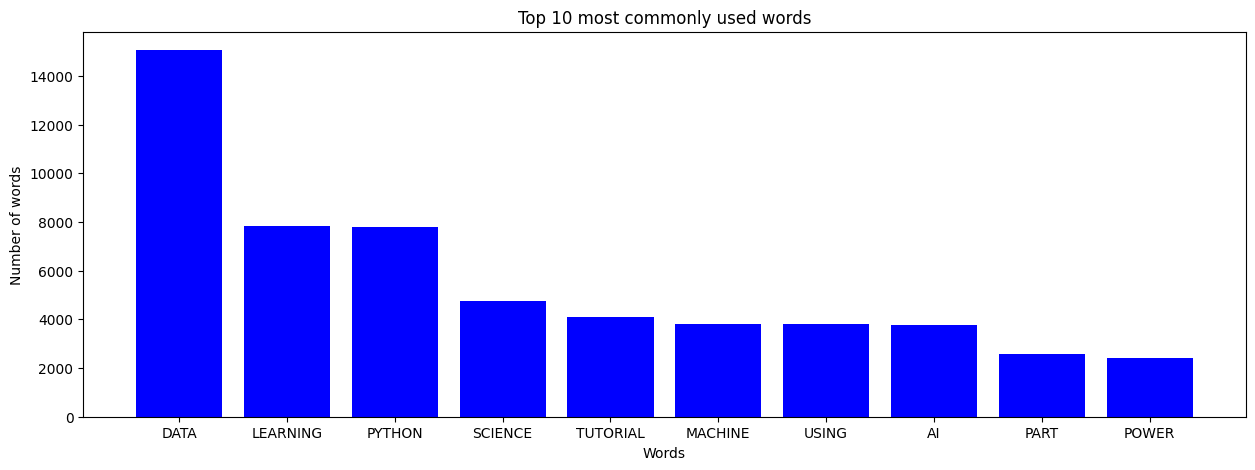

In [5]:
plt.figure(figsize=(15, 5))
plt.bar([t[0] for t in mostcommon], [t[1] for t in mostcommon], color='blue')

plt.xlabel('Words')
plt.ylabel('Number of words')
plt.title('Top 10 most commonly used words')
plt.show()

Step 4: Present visually using Word Cloud

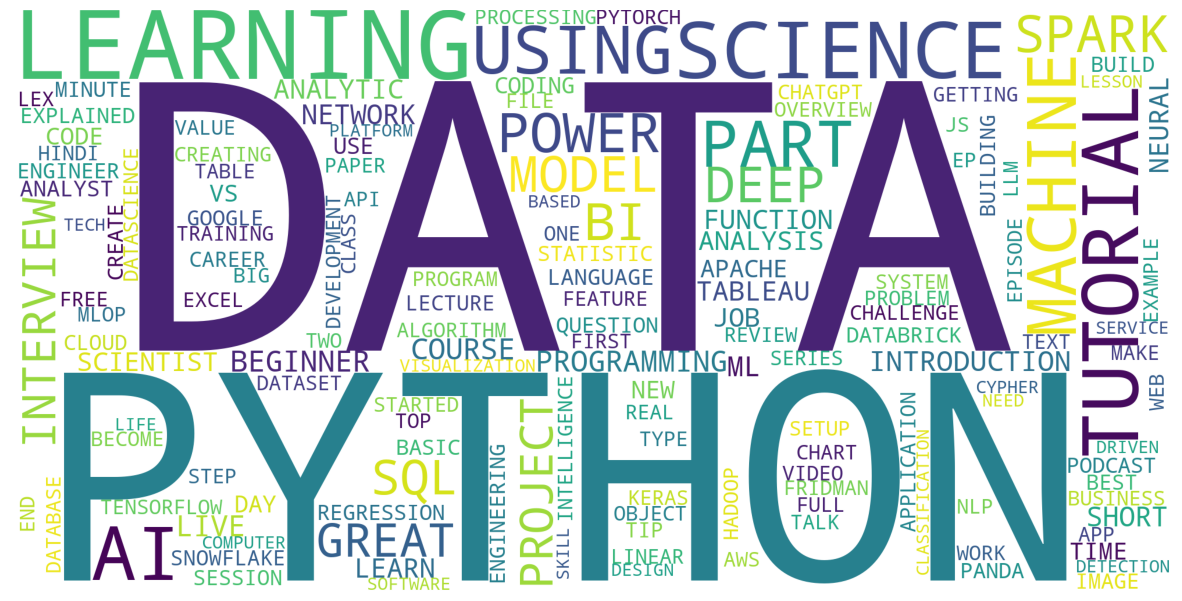

In [6]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white', max_words=150, min_word_length=2,
                      colormap='viridis', collocations=False).generate(words_str)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud) 
plt.axis("off");

### **Question 6:** How has user interest in videos with data science content changed over the years?

**Answering this question will:** It helps us know the level of viewer interest and predict future viewership.

**How we answer this question:** Calculate the total views of all videos over each quarter of the year.

Preprocessing

In [7]:
video_df["publishedAt"] = pd.to_datetime(video_df["publishedAt"])
filtered_data = video_df.loc[video_df["publishedAt"].dt.year != 2023, ["publishedAt", "viewCount"]]
filtered_data.index = filtered_data.index - 1

Step 1: Divide video publishing time into quarters of the year and calculate views for each quarter

In [8]:
list_of_years = np.unique(video_df['publishedAt'].dt.year)

quarters = (filtered_data['publishedAt'].dt.month - 1) // 3 + 1
list_of_quarters = (filtered_data['publishedAt'].dt.year - 2006) * 4 + quarters

distribution = np.bincount(list_of_quarters, weights=filtered_data['viewCount'])
distribution = distribution[1:]

Step 2: Draw a line graph to represent

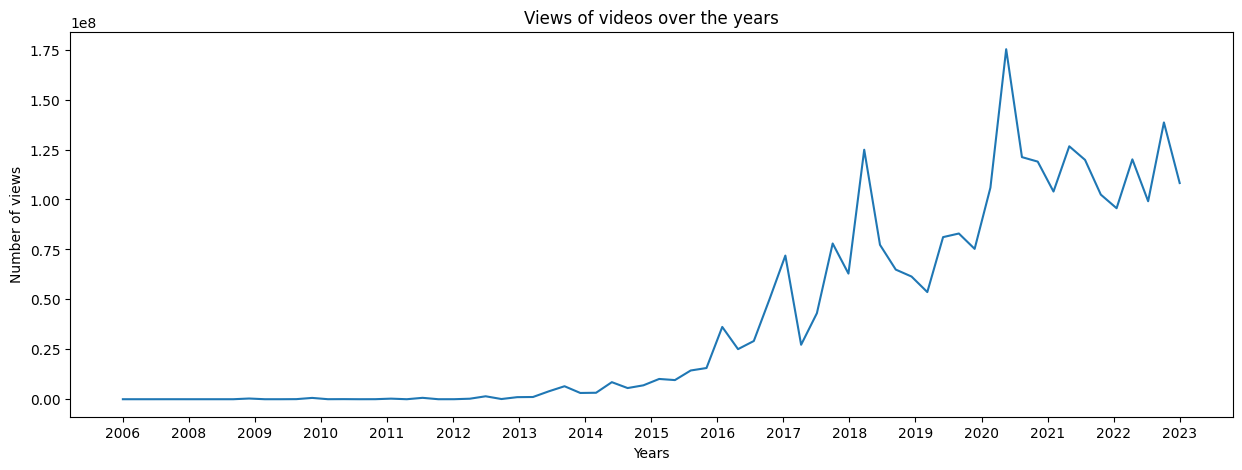

In [9]:
fig = plt.figure(figsize = (15, 5))
plt.plot(distribution)

plt.xticks(np.linspace(0, 67, 17), list_of_years, ha="center")

plt.xlabel("Years")
plt.ylabel("Number of views")
plt.title("Views of videos over the years")
plt.show()